In [ ]:
#dataframes
import pandas as pd
pd.set_option('display.max_columns', None)
#operaciones matemáticas
import numpy as np
# visualización
import matplotlib.pyplot as plt
import seaborn as sns
#file operations
import os

In [89]:
wait = pd.read_csv("files/ER_wait_time_clean.csv", index_col = 0)

Quick EDA of the new cleaned data

In [90]:
wait.head()

,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Visit Time,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Specialist-to-Patient Ratio,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction,Number of Patients
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10,20:20:56,Saturday,Winter,Late Morning,Medium,4,3,1.00,92,17,22,66,105,Discharged,1,3
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28,02:07:47,Thursday,Fall,Evening,Medium,4,0,0.00,38,9,30,30,69,Discharged,3,2
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,2024-09-30,04:02:28,Monday,Fall,Evening,Low,5,1,0.25,38,38,40,125,203,Discharged,1,4
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,2024-02-27,00:31:13,Tuesday,Winter,Evening,High,4,5,1.25,94,8,16,64,88,Discharged,2,4
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,2024-03-06,16:52:26,Wednesday,Spring,Afternoon,Low,4,8,1.33,74,26,29,63,118,Discharged,1,6


In [91]:
wait.shape

(5000, 22)

In [105]:
wait.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Visit ID                            5000 non-null   object 
 1   Patient ID                          5000 non-null   object 
 2   Hospital ID                         5000 non-null   object 
 3   Hospital Name                       5000 non-null   object 
 4   Region                              5000 non-null   object 
 5   Visit Date                          5000 non-null   object 
 6   Visit Time                          5000 non-null   object 
 7   Day of Week                         5000 non-null   object 
 8   Season                              5000 non-null   object 
 9   Time of Day                         5000 non-null   object 
 10  Urgency Level                       5000 non-null   object 
 11  Nurse-to-Patient Ratio              5000 non-nul

In [107]:
wait.describe().T

,count,mean,std,min,25%,50%,75%,max
Nurse-to-Patient Ratio,5000.0,3.23820,1.200895,1.0,3.00,3.00,4.0,5.0
Specialist Availability,5000.0,3.87500,3.043292,0.0,1.00,3.00,6.0,10.0
Specialist-to-Patient Ratio,5000.0,1.25316,1.558184,0.0,0.33,0.75,1.5,10.0
Facility Size (Beds),5000.0,87.11880,57.998585,10.0,36.00,74.00,138.0,200.0
Time to Registration (min),5000.0,11.70420,10.437284,0.0,3.00,8.00,18.0,66.0
Time to Triage (min),5000.0,24.82700,24.807994,1.0,6.00,16.00,36.0,163.0
Time to Medical Professional (min),5000.0,45.38540,35.619975,2.0,17.00,35.00,66.0,233.0
Total Wait Time (min),5000.0,81.91660,68.084538,4.0,27.00,60.00,122.0,442.0
Patient Satisfaction,5000.0,2.77160,1.424584,1.0,1.00,3.00,4.0,5.0
Number of Patients,5000.0,4.44760,2.329450,1.0,3.00,4.00,6.0,14.0


In [108]:
wait.describe(include='O').T

,count,unique,top,freq
Visit ID,5000,5000,HOSP-1-20240210-0001,1
Patient ID,5000,5000,PAT-00001,1
Hospital ID,5000,5,HOSP-2,1023
Hospital Name,5000,5,Riverside Medical Center,1023
Region,5000,2,Urban,3006
Visit Date,5000,365,2024-07-08,27
Visit Time,5000,4852,02:57:57,2
Day of Week,5000,7,Monday,768
Season,5000,4,Summer,1281
Time of Day,5000,5,Evening,1725


Begin detailed data analysis

In [ ]:
# Calculate Pearson correlation matrix to measure linear relationships between numeric variables
correlacion1 = wait.corr(method = 'pearson', numeric_only= True)
correlacion1

,Nurse-to-Patient Ratio,Specialist Availability,Specialist-to-Patient Ratio,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Satisfaction,Number of Patients
Nurse-to-Patient Ratio,1.000000,0.002511,-0.005254,0.002937,0.652054,0.646690,0.673622,0.688015,-0.738991,0.004642
Specialist Availability,0.002511,1.000000,0.649998,0.503209,0.006500,-0.000512,0.011028,0.006579,-0.014892,-0.012282
Specialist-to-Patient Ratio,-0.005254,0.649998,1.000000,0.319879,-0.070962,-0.062401,-0.071212,-0.070872,0.049864,-0.468124
Facility Size (Beds),0.002937,0.503209,0.319879,1.000000,0.003402,-0.012659,0.000980,-0.003578,-0.010528,0.007172
Time to Registration (min),0.652054,0.006500,-0.070962,0.003402,1.000000,0.857030,0.876695,0.924238,-0.825610,0.124707
Time to Triage (min),0.646690,-0.000512,-0.062401,-0.012659,0.857030,1.000000,0.875145,0.953604,-0.795599,0.100808
Time to Medical Professional (min),0.673622,0.011028,-0.071212,0.000980,0.876695,0.875145,1.000000,0.976446,-0.857626,0.130418
Total Wait Time (min),0.688015,0.006579,-0.070872,-0.003578,0.924238,0.953604,0.976446,1.000000,-0.865145,0.124080
Patient Satisfaction,-0.738991,-0.014892,0.049864,-0.010528,-0.825610,-0.795599,-0.857626,-0.865145,1.000000,-0.089446
Number of Patients,0.004642,-0.012282,-0.468124,0.007172,0.124707,0.100808,0.130418,0.124080,-0.089446,1.000000


In [ ]:
# Calculate Spearman correlation matrix to measure monotonic relationships (rank-based)
correlacion2 = wait.corr(method = 'spearman', numeric_only= True)
correlacion2

,Nurse-to-Patient Ratio,Specialist Availability,Specialist-to-Patient Ratio,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Satisfaction,Number of Patients
Nurse-to-Patient Ratio,1.000000,0.006502,0.000670,0.004172,0.758550,0.793817,0.764930,0.792017,-0.741376,0.005366
Specialist Availability,0.006502,1.000000,0.853899,0.548005,0.012410,0.008721,0.015110,0.013184,-0.015546,-0.011268
Specialist-to-Patient Ratio,0.000670,0.853899,1.000000,0.466897,-0.048369,-0.040245,-0.050282,-0.048386,0.034989,-0.470622
Facility Size (Beds),0.004172,0.548005,0.466897,1.000000,0.010684,0.000024,0.010064,0.006611,-0.009452,0.003035
Time to Registration (min),0.758550,0.012410,-0.048369,0.010684,1.000000,0.920752,0.909536,0.949495,-0.903273,0.115906
Time to Triage (min),0.793817,0.008721,-0.040245,0.000024,0.920752,1.000000,0.920240,0.968859,-0.922360,0.093989
Time to Medical Professional (min),0.764930,0.015110,-0.050282,0.010064,0.909536,0.920240,1.000000,0.985288,-0.936883,0.126788
Total Wait Time (min),0.792017,0.013184,-0.048386,0.006611,0.949495,0.968859,0.985288,1.000000,-0.949523,0.118994
Patient Satisfaction,-0.741376,-0.015546,0.034989,-0.009452,-0.903273,-0.922360,-0.936883,-0.949523,1.000000,-0.093963
Number of Patients,0.005366,-0.011268,-0.470622,0.003035,0.115906,0.093989,0.126788,0.118994,-0.093963,1.000000


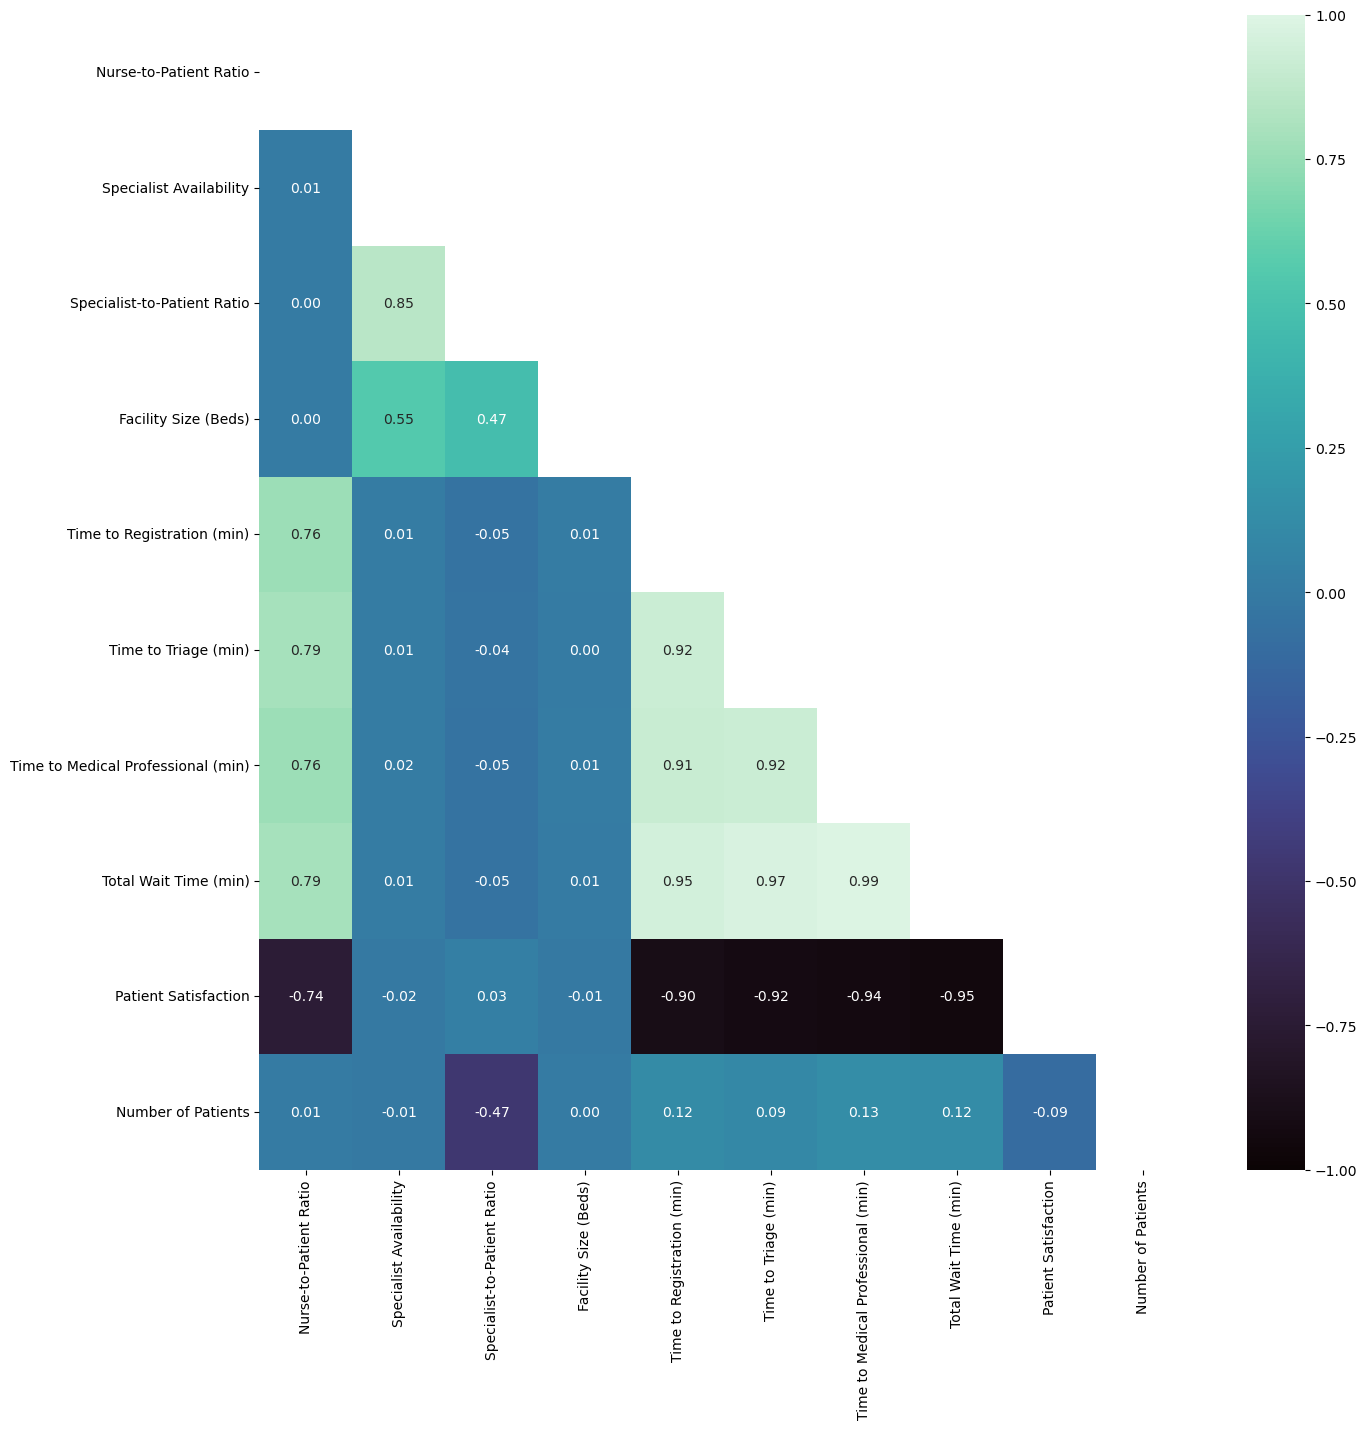

In [ ]:
# Create a figure for the correlation heatmap visualization
plt.figure(figsize = (15, 15))

# Generate a mask for the upper triangle to avoid redundant information in heatmap
mask = np.triu(np.ones_like(correlacion2, dtype=bool))

# Create a heatmap with the Spearman correlation matrix
sns.heatmap(correlacion2, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

- The strongest correlations are seeing between Patient Satisfaction and Waiting time variables

Outlier detection section:

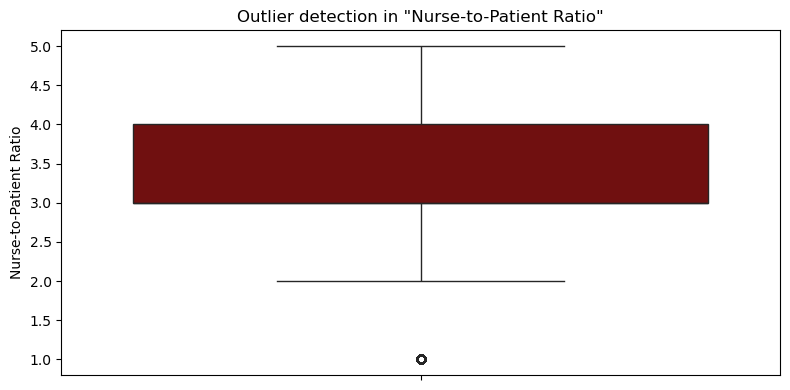

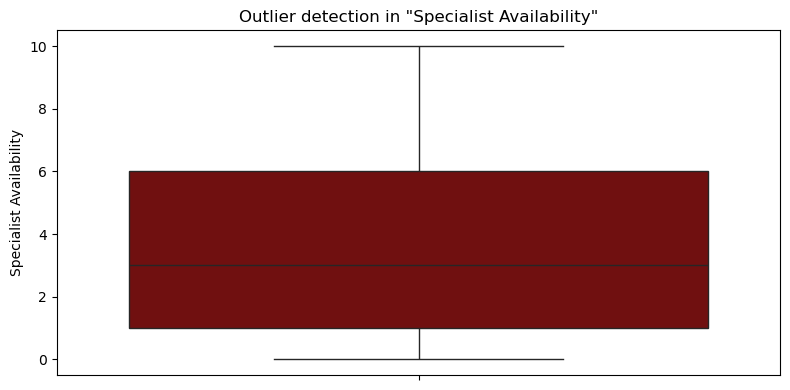

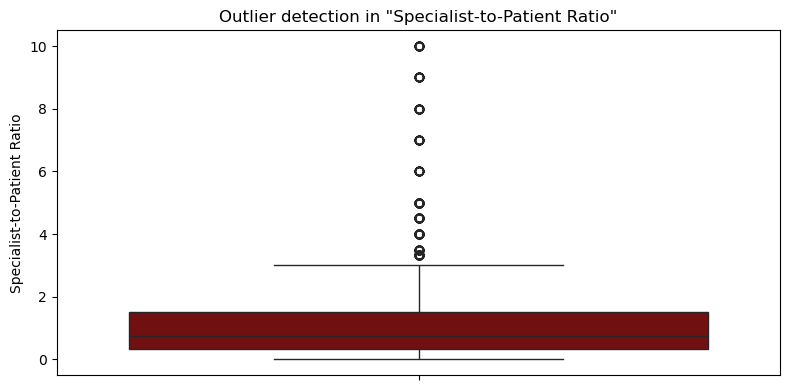

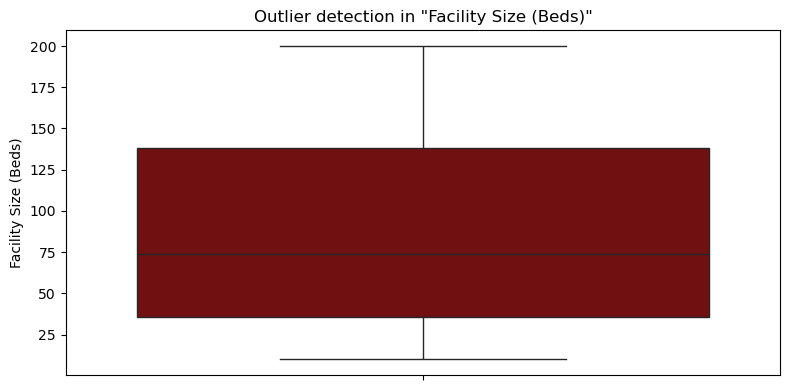

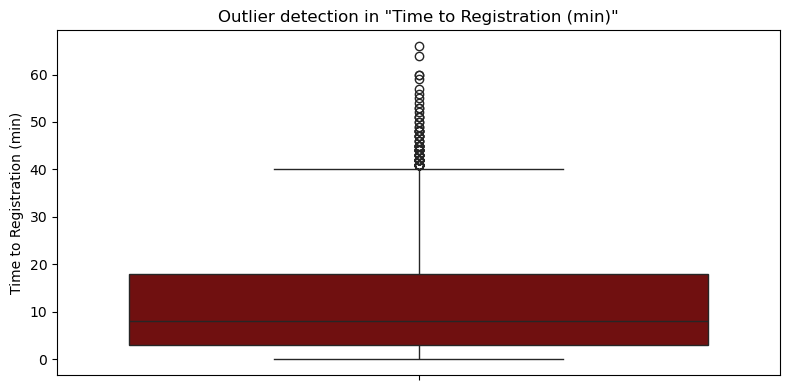

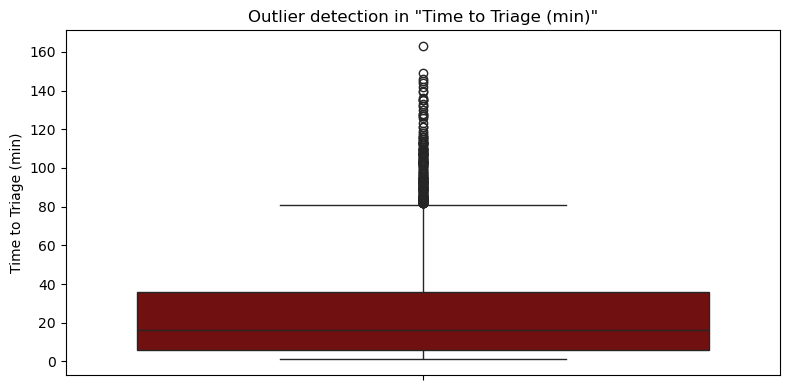

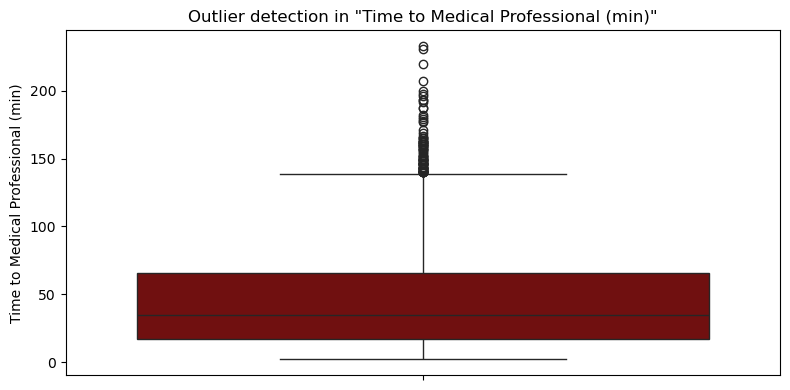

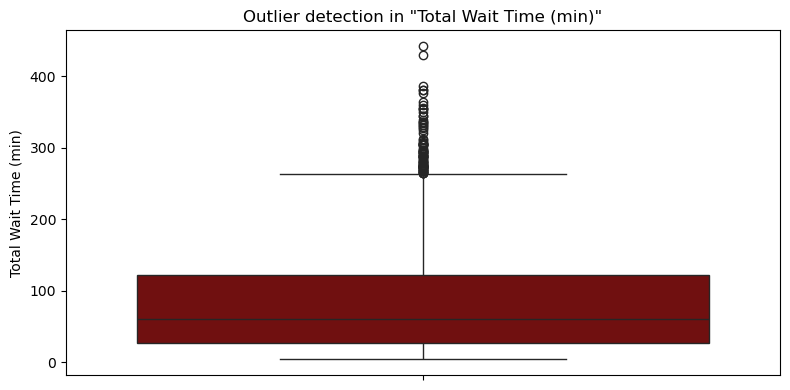

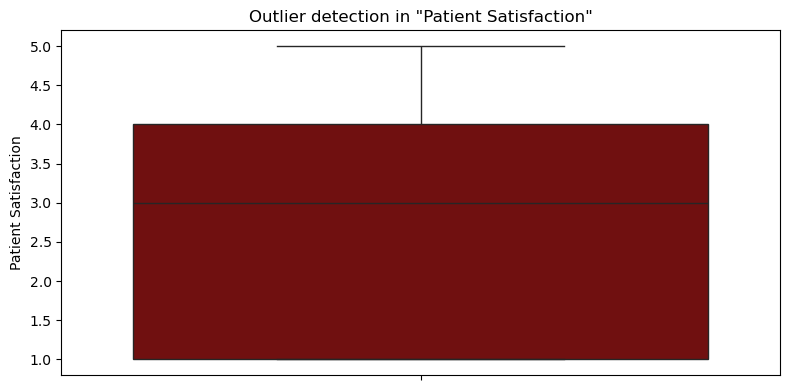

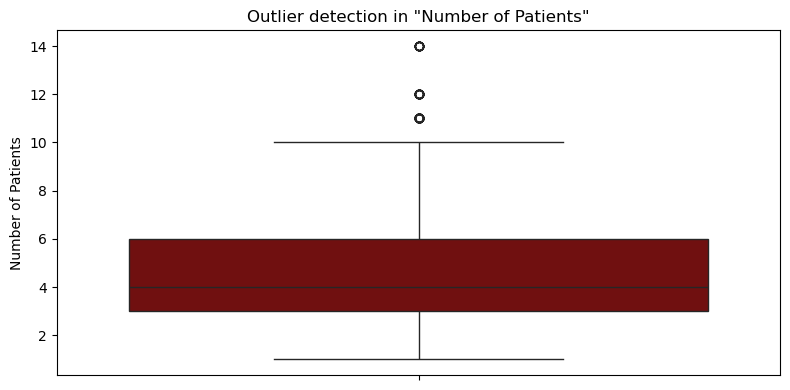

In [ ]:
# Generate boxplots for each numeric column to visually identify outliers
for col in correlacion2.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=wait, y=col, color='maroon', )
    plt.title(f'Outlier detection in "{col}"')
    plt.tight_layout()
    plt.show();

In [ ]:
# Calculate average patient satisfaction scores for each hospital
df_hospital_name = wait.groupby("Hospital Name")["Patient Satisfaction"].mean().reset_index()
df_hospital_name

,Hospital Name,Patient Satisfaction
0,Northside Community Hospital,2.808809
1,Riverside Medical Center,2.759531
2,Springfield General Hospital,2.731388
3,St. Mary’s Regional Health,2.775879
4,Summit Health Center,2.782609


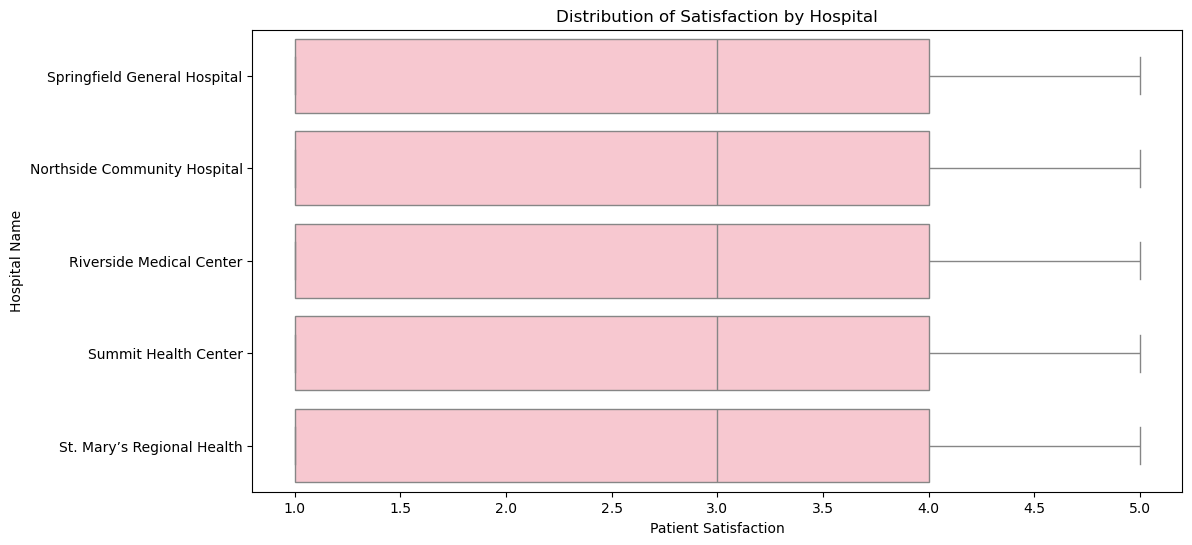

In [ ]:
# Visualize satisfaction distribution across different hospitals
plt.figure(figsize=(12, 6))
sns.boxplot(data=wait, x='Patient Satisfaction', y='Hospital Name', color='pink')
plt.title('Distribution of Satisfaction by Hospital');

- Conclusion: All hospitals show similar satisfaction levels

In [ ]:
# Calculate average patient satisfaction scores for each geographic region
df_regional = wait.groupby("Region")["Patient Satisfaction"].mean().reset_index()
df_regional

,Region,Patient Satisfaction
0,Rural,2.792377
1,Urban,2.757818


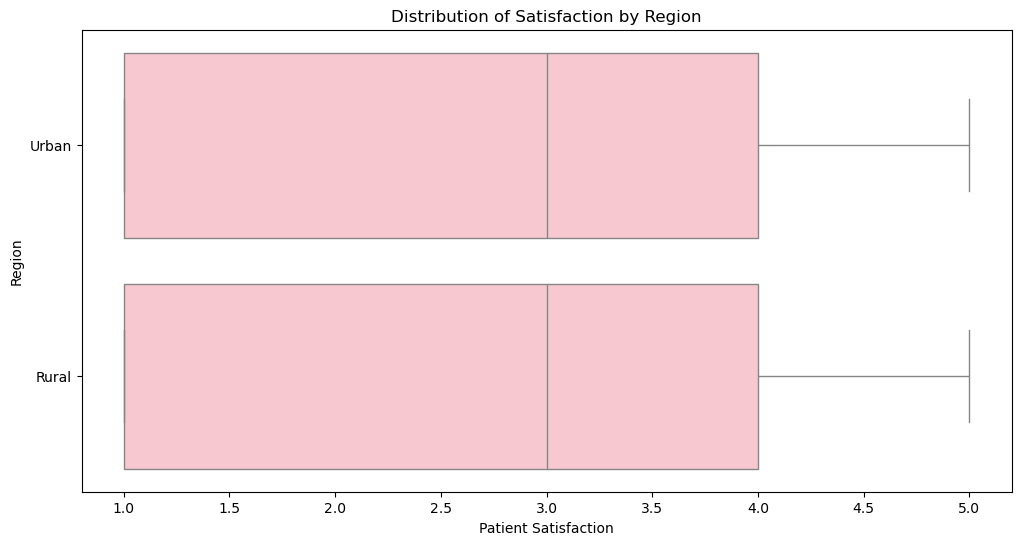

In [ ]:
# Visualize satisfaction distribution across different regions
plt.figure(figsize=(12, 6))
sns.boxplot(data=wait, x='Patient Satisfaction', y='Region', color='pink')
plt.title('Distribution of Satisfaction by Region');

- Conclusion: Geographic location does not significantly affect patient satisfaction

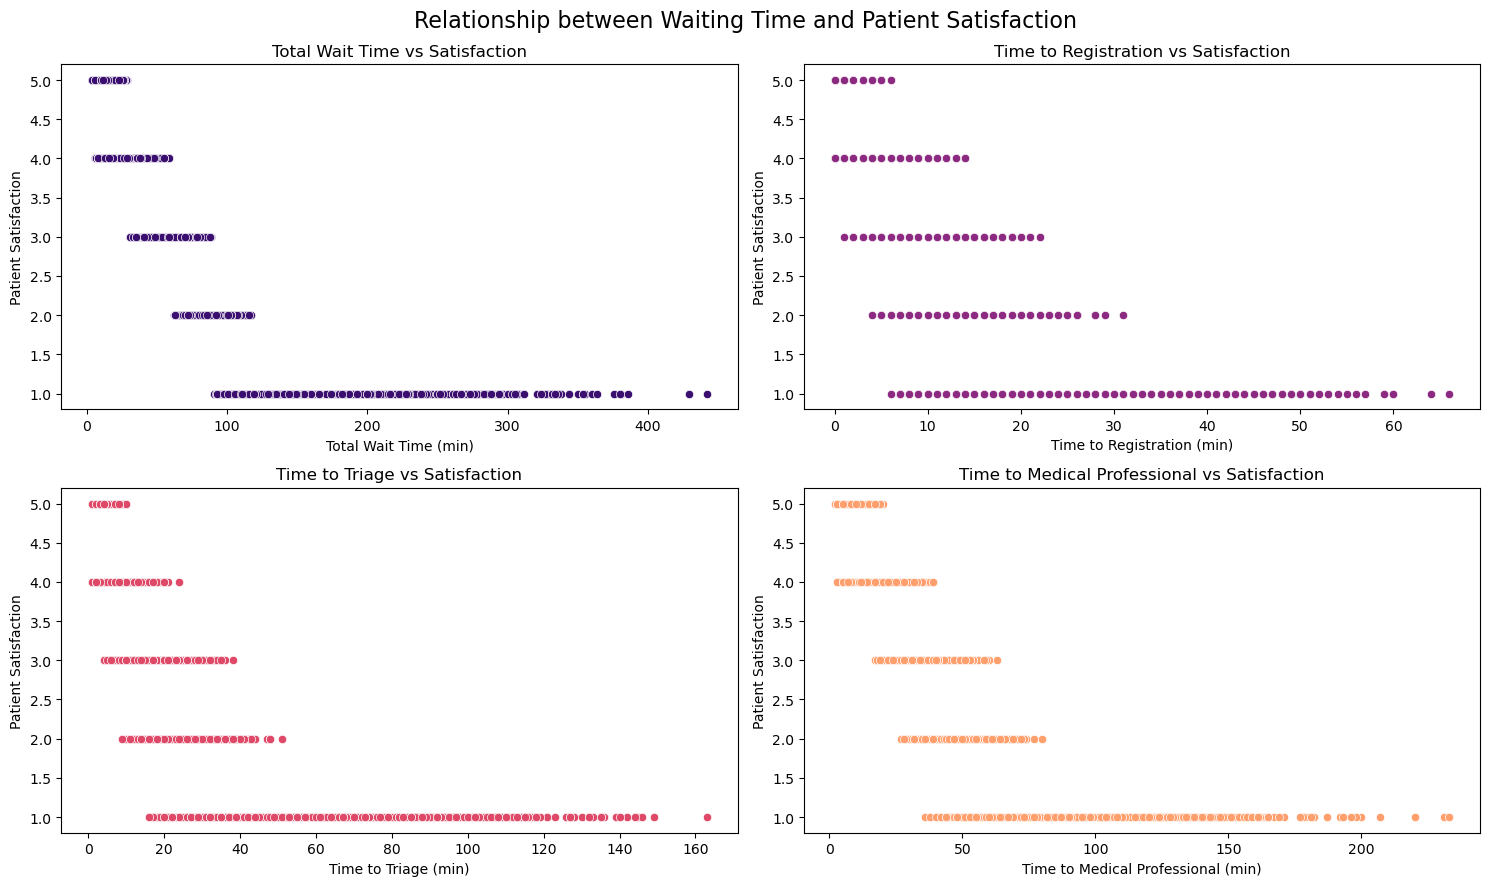

In [ ]:
# Create a 2x2 grid of scatter plots to analyze the relationship between
# different wait time components and patient satisfaction
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,9))

palette = sns.color_palette("magma", 4)
sns.scatterplot(data=wait, 
                x='Total Wait Time (min)', 
                y='Patient Satisfaction', 
                alpha=1, 
                color=palette[0],
                ax=axes[0,0])

sns.scatterplot(data=wait, 
                x='Time to Registration (min)', 
                y='Patient Satisfaction', 
                alpha=1, 
                color=palette[1],
                ax=axes[0,1])

sns.scatterplot(data=wait, 
                x='Time to Triage (min)', 
                y='Patient Satisfaction', 
                alpha=1, 
                color=palette[2],
                ax=axes[1,0])

sns.scatterplot(data=wait, 
                x='Time to Medical Professional (min)', 
                y='Patient Satisfaction', 
                alpha=1, 
                color=palette[3],
                ax=axes[1,1])

axes[0,0].set_title('Total Wait Time vs Satisfaction')
axes[0,1].set_title('Time to Registration vs Satisfaction')
axes[1,0].set_title('Time to Triage vs Satisfaction')
axes[1,1].set_title('Time to Medical Professional vs Satisfaction')

plt.suptitle('Relationship between Waiting Time and Patient Satisfaction', fontsize=16)
plt.tight_layout();

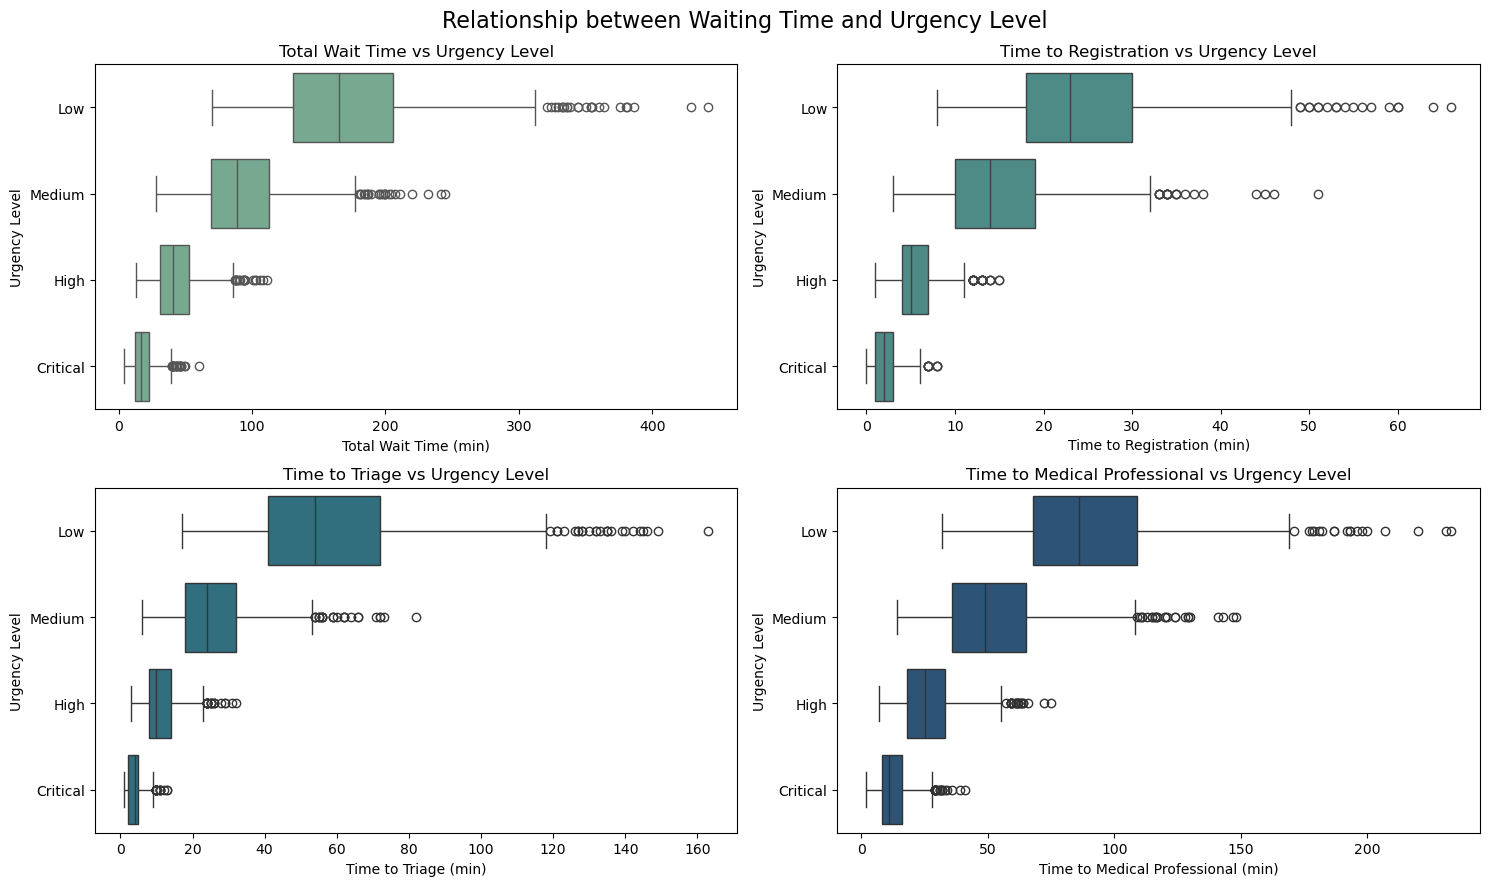

In [ ]:
# Create another 2x2 grid to analyze wait times by patient urgency level
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,9))

palette = sns.color_palette("crest", 4)
sns.boxplot(data=wait, x='Total Wait Time (min)', y='Urgency Level', ax=axes[0,0], color=palette[0], order=['Low', 'Medium', 'High', 'Critical'])

sns.boxplot(data=wait, x='Time to Registration (min)', y='Urgency Level', ax=axes[0,1], color=palette[1], order=['Low', 'Medium', 'High', 'Critical'])

sns.boxplot(data=wait, x='Time to Triage (min)', y='Urgency Level', ax=axes[1,0], color=palette[2], order=['Low', 'Medium', 'High', 'Critical'])

sns.boxplot(data=wait, x='Time to Medical Professional (min)', y='Urgency Level', ax=axes[1,1], color=palette[3], order=['Low', 'Medium', 'High', 'Critical'])

axes[0,0].set_title('Total Wait Time vs Urgency Level')
axes[0,1].set_title('Time to Registration vs Urgency Level')
axes[1,0].set_title('Time to Triage vs Urgency Level')
axes[1,1].set_title('Time to Medical Professional vs Urgency Level')

plt.suptitle('Relationship between Waiting Time and Urgency Level', fontsize=16)
plt.tight_layout();

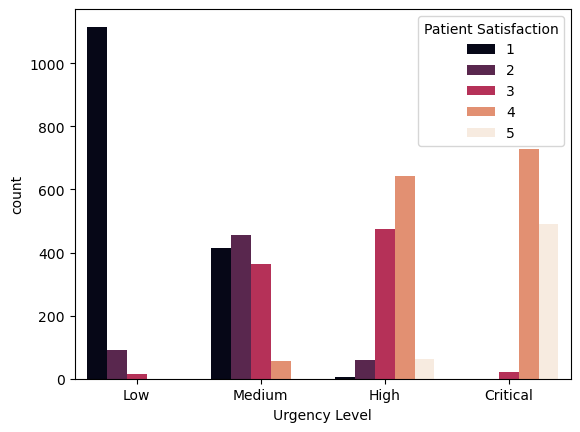

In [ ]:
# Count plot showing patient satisfaction distribution across urgency levels
sns.countplot(x = "Urgency Level", hue = "Patient Satisfaction", data = wait, palette = "rocket", order=['Low', 'Medium', 'High', 'Critical']);

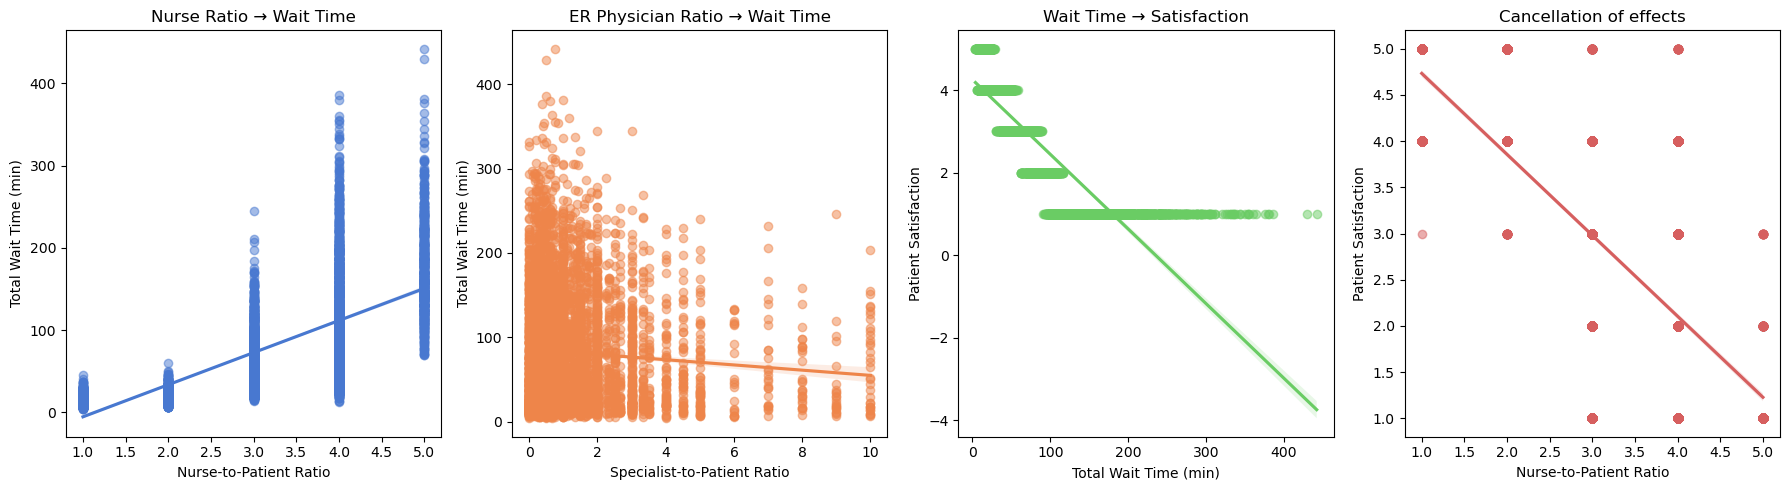

In [ ]:
# Analyze staffing ratios and their impact on wait times and satisfaction
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
palette = sns.color_palette("muted", 4)

sns.regplot(data=wait, x='Nurse-to-Patient Ratio', y='Total Wait Time (min)', 
           ax=axes[0], scatter_kws={'alpha':0.5}, color=palette[0])
axes[0].set_title('Nurse Ratio → Wait Time')

sns.regplot(data=wait, x='Specialist-to-Patient Ratio', y='Total Wait Time (min)', 
           ax=axes[1], scatter_kws={'alpha':0.5}, color=palette[1])
axes[1].set_title('ER Physician Ratio → Wait Time')
 
sns.regplot(data=wait, x='Total Wait Time (min)', y='Patient Satisfaction',
           ax=axes[2], scatter_kws={'alpha':0.5}, color=palette[2])
axes[2].set_title('Wait Time → Satisfaction')

sns.regplot(data=wait, x='Nurse-to-Patient Ratio', y='Patient Satisfaction',
           ax=axes[3], scatter_kws={'alpha':0.5}, color=palette[3])
axes[3].set_title('Cancellation of effects')

plt.tight_layout()
plt.show()

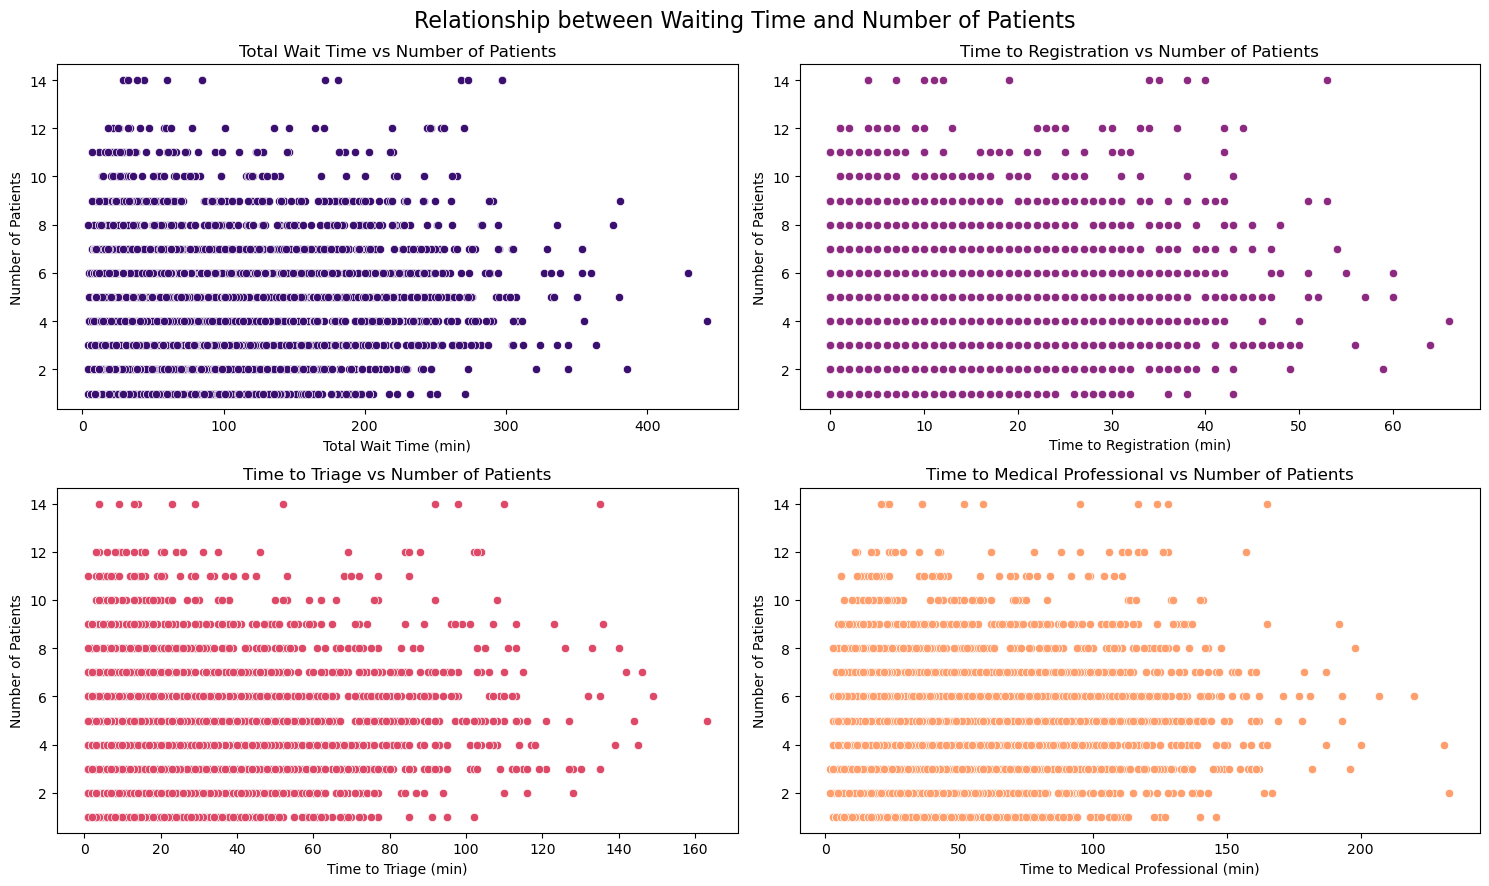

In [ ]:
# Analyze relationship between wait times and patient volume
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,9))

palette = sns.color_palette("magma", 4)
sns.scatterplot(data=wait, 
                x='Total Wait Time (min)', 
                y='Number of Patients', 
                alpha=1, 
                color=palette[0],
                ax=axes[0,0])

sns.scatterplot(data=wait, 
                x='Time to Registration (min)', 
                y='Number of Patients', 
                alpha=1, 
                color=palette[1],
                ax=axes[0,1])

sns.scatterplot(data=wait, 
                x='Time to Triage (min)', 
                y='Number of Patients', 
                alpha=1, 
                color=palette[2],
                ax=axes[1,0])

sns.scatterplot(data=wait, 
                x='Time to Medical Professional (min)', 
                y='Number of Patients', 
                alpha=1, 
                color=palette[3],
                ax=axes[1,1])

axes[0,0].set_title('Total Wait Time vs Number of Patients')
axes[0,1].set_title('Time to Registration vs Number of Patients')
axes[1,0].set_title('Time to Triage vs Number of Patients')
axes[1,1].set_title('Time to Medical Professional vs Number of Patients')

plt.suptitle('Relationship between Waiting Time and Number of Patients', fontsize=16)
plt.tight_layout();

<Axes: xlabel='Season', ylabel='Total Wait Time (min)'>

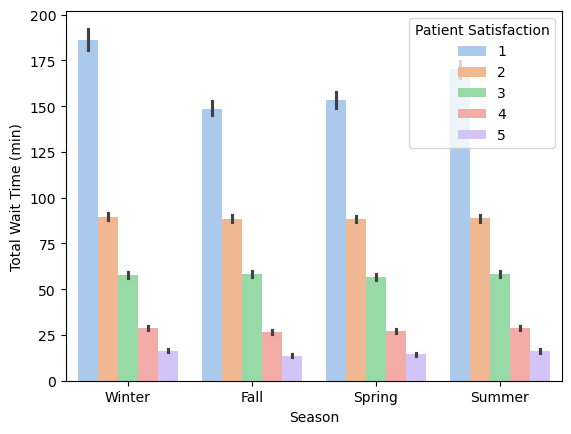

In [ ]:
# Analyze seasonal and weekly patterns in wait times and satisfaction
sns.barplot(x = "Season", y = 'Total Wait Time (min)', hue = 'Patient Satisfaction', palette='pastel', data = wait, order=['Winter', 'Fall', 'Spring', 'Summer'])

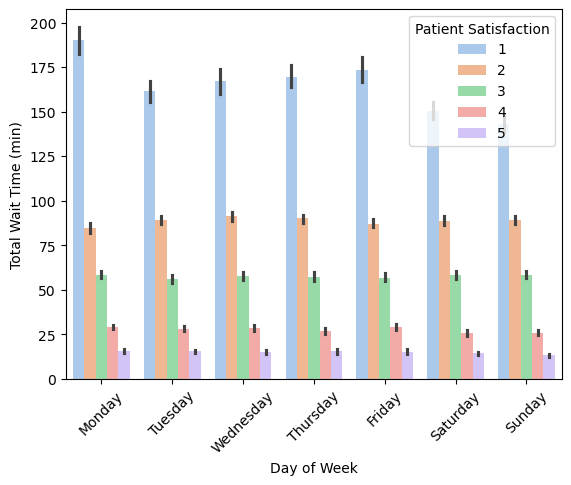

In [128]:
sns.barplot(x = "Day of Week", y = 'Total Wait Time (min)', hue = 'Patient Satisfaction', palette='pastel', data = wait, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=45);

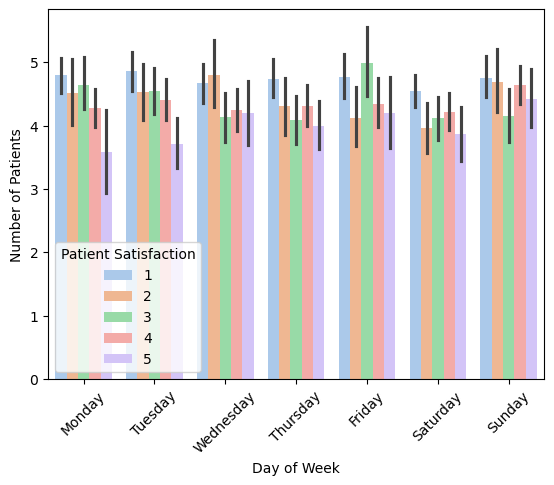

In [129]:
sns.barplot(x = "Day of Week", y = 'Number of Patients', hue = 'Patient Satisfaction', palette='pastel', data = wait, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=45);

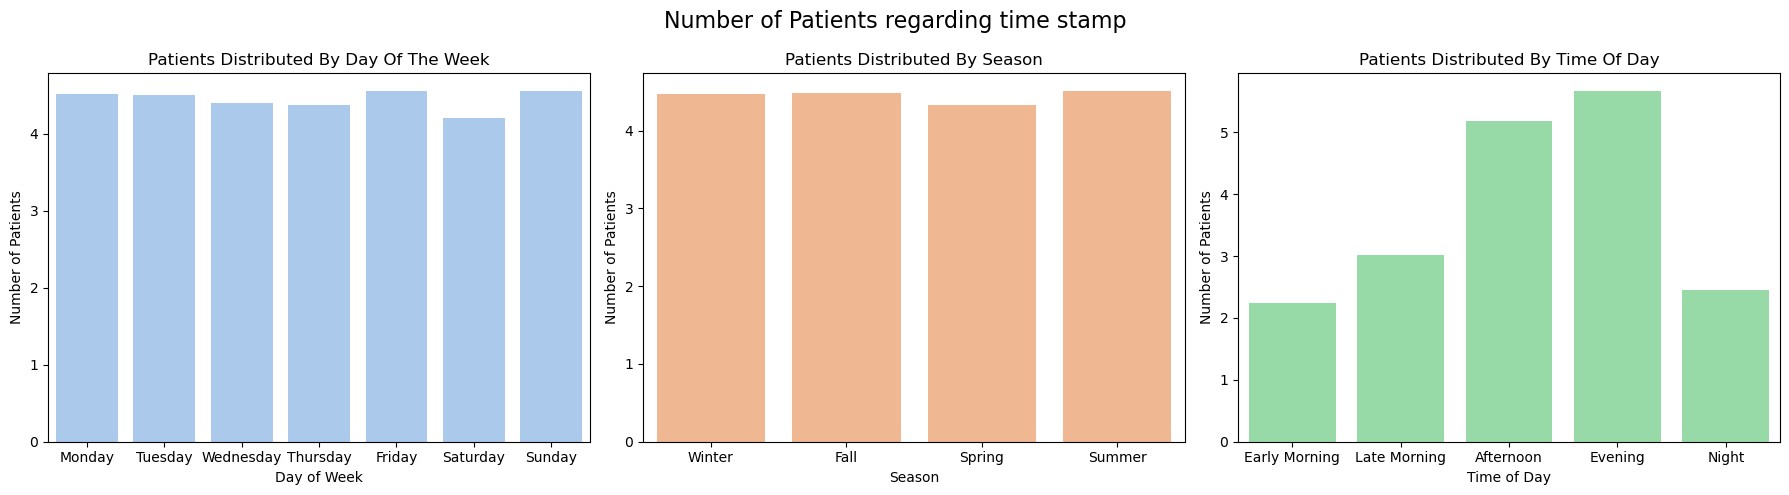

In [ ]:
# Analyze patient distribution across different time dimensions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
palette = sns.color_palette("pastel", 3)

sns.barplot(x = "Day of Week", y = 'Number of Patients', estimator='mean', errorbar=None, ax = axes[0], data = wait, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color=palette[0])
axes[0].set_title('Patients Distributed By Day Of The Week')

sns.barplot(x = "Season", y = "Number of Patients", estimator='mean', errorbar=None, data = wait, ax = axes[1], order=['Winter', 'Fall', 'Spring', 'Summer'], color=palette[1])
axes[1].set_title('Patients Distributed By Season')
  
sns.barplot(x = "Time of Day", y = "Number of Patients", estimator='mean', errorbar=None, data = wait, ax = axes[2], order=['Early Morning', 'Late Morning', 'Afternoon', 'Evening', 'Night'], color=palette[2])
axes[2].set_title('Patients Distributed By Time Of Day')

plt.suptitle('Number of Patients regarding time stamp', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate average patient numbers for different time categories
check1 = wait.groupby('Day of Week')['Number of Patients'].mean().reset_index()
check2 = wait.groupby('Season')['Number of Patients'].mean().reset_index()
check3 = wait.groupby('Time of Day')['Number of Patients'].mean().reset_index()


In [119]:
check1

,Day of Week,Number of Patients
0,Friday,4.559124
1,Monday,4.523438
2,Saturday,4.203994
3,Sunday,4.555862
4,Thursday,4.376771
5,Tuesday,4.500675
6,Wednesday,4.400593


In [120]:
check2

,Season,Number of Patients
0,Fall,4.479741
1,Spring,4.321923
2,Summer,4.509758
3,Winter,4.475358


In [121]:
check3

,Time of Day,Number of Patients
0,Afternoon,5.177097
1,Early Morning,2.247357
2,Evening,5.670145
3,Late Morning,3.010390
4,Night,2.452830


In [ ]:
#This code ensures there's a dedicated folder to store all the visualization images generated during the analysis.
images_dir = "images"
if not os.path.exists(images_dir):
    os.makedirs(images_dir)
    print(f"Created directory: {images_dir}")
else:
    print(f"Directory already exists: {images_dir}")

Directory already exists: images
